In [4]:
import pandas as pd

# Load the matches data
matches_df = pd.read_csv(r'C:\Users\siman\OneDrive\Documents\matches.csv')

# Load the deliveries data
deliveries_df = pd.read_csv(r'C:\Users\siman\OneDrive\Documents\deliveries.csv')

# Show the first 5 rows of each
print("Matches Data:")
print(matches_df.head())

print("\nDeliveries Data:")
print(deliveries_df.head())


Matches Data:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0

In [9]:
import pandas as pd
import sys
import os

print("Current working directory:", os.getcwd())

# Load Data using absolute path
try:
    matches_df = pd.read_csv(r'C:\Users\siman\OneDrive\Documents\matches.csv')
    deliveries_df = pd.read_csv(r'C:\Users\siman\OneDrive\Documents\deliveries.csv')
    print("✅ Datasets loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'matches.csv' or 'deliveries.csv' not found.")
    print("Make sure the files are located at: C:\\Users\\siman\\OneDrive\\Documents\\")
    print("📦 Download from: https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020")
    matches_df = pd.DataFrame()
    deliveries_df = pd.DataFrame()
    # sys.exit("Terminating script due to missing files.")

# Inspect DataFrames
if not matches_df.empty and not deliveries_df.empty:
    print("\n" + "-"*50)
    print("📊 Matches DataFrame Info:")
    matches_df.info()

    print("\n" + "-"*50)
    print("📦 Deliveries DataFrame Info:")
    deliveries_df.info()

    print("\n🧾 Matches DataFrame Head:")
    print(matches_df.head())

    print("\n🧾 Deliveries DataFrame Head:")
    print(deliveries_df.head())


Current working directory: C:\Users\siman
✅ Datasets loaded successfully!

--------------------------------------------------
📊 Matches DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  

In [12]:
print(deliveries_df.columns.tolist())



['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


In [23]:
import pandas as pd

# Load CSV
df = pd.read_csv(r'C:\Users\siman\OneDrive\Documents\merged_ipl_data_2008_to_2023.csv', low_memory=False)

# Check if key columns exist
required_columns = ['striker', 'runs_off_bat', 'wides']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Ensure numeric data
df['runs_off_bat'] = pd.to_numeric(df['runs_off_bat'], errors='coerce')
df['wides'] = pd.to_numeric(df['wides'], errors='coerce')

# Filter out wide balls (they don't count as valid deliveries for balls faced)
valid_balls = df[df['wides'].isna() | (df['wides'] == 0)]

# Total runs per batsman
total_runs = df.groupby('striker')['runs_off_bat'].sum().reset_index(name='Total Runs')

# Balls faced per batsman (excluding wide balls)
balls_faced = valid_balls.groupby('striker').size().reset_index(name='Balls Faced')

# Merge both
batsman_stats = pd.merge(total_runs, balls_faced, on='striker')

# Calculate strike rate
batsman_stats['Strike Rate'] = (batsman_stats['Total Runs'] / batsman_stats['Balls Faced']) * 100

# Rename column for output clarity
batsman_stats.rename(columns={'striker': 'Batsman'}, inplace=True)

# Sort by total runs
batsman_stats = batsman_stats.sort_values(by='Total Runs', ascending=False)

# Show top 10 batsmen
print(batsman_stats.head(10))


            Batsman  Total Runs  Balls Faced  Strike Rate
598         V Kohli       14546        11180   130.107335
489        S Dhawan       13234        10410   127.127762
138       DA Warner       12798         9154   139.807734
456       RG Sharma       12426         9558   130.006277
520        SK Raina       11072         8092   136.826495
27   AB de Villiers       10362         6822   151.890941
357        MS Dhoni       10164         7478   135.918695
116        CH Gayle        9994         6692   149.342499
478      RV Uthappa        9908         7602   130.334123
269      KD Karthik        9034         6812   132.618908


✅ Columns in the dataset: ['match_id', 'season', 'start_date', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed']

📈 Calculating batsman stats...
            Batsman  Total_Runs  Balls_Faced  Strike_Rate
598         V Kohli       14546        11478   126.729395
489        S Dhawan       13234        10716   123.497574
138       DA Warner       12798         9438   135.600763
456       RG Sharma       12426         9780   127.055215
520        SK Raina       11072         8354   132.535312
27   AB de Villiers       10362         6974   148.580442
357        MS Dhoni       10164         7730   131.487710
116        CH Gayle        9994         7032   142.121729
478      RV Uthappa        9908         7854   126.152279
269      KD Karthik        9034         6984   129.352806


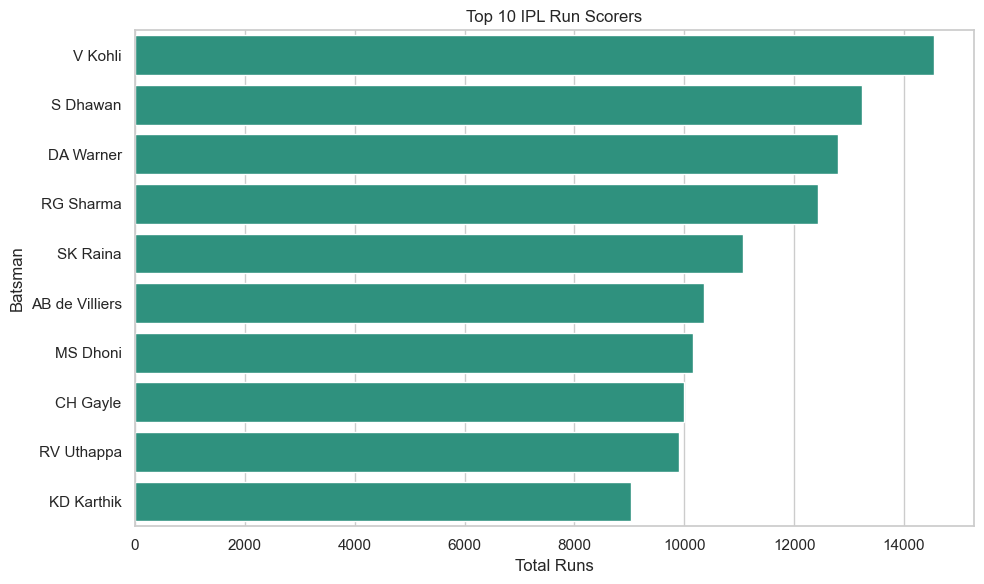


🎯 Calculating bowler stats...
              bowler  Wickets   Overs  Economy_Rate
498        YS Chahal      374  1057.4      7.463599
115         DJ Bravo      366  1040.0      8.034615
331        PP Chawla      358  1213.2      7.786813
7           A Mishra      346  1119.4      7.225365
338         R Ashwin      342  1398.0      6.779685
67           B Kumar      340  1189.2      7.106502
417       SL Malinga      340   942.2      6.778918
425        SP Narine      326  1250.2      6.604639
355        RA Jadeja      304  1182.2      7.461517
157  Harbhajan Singh      300  1138.4      6.899297


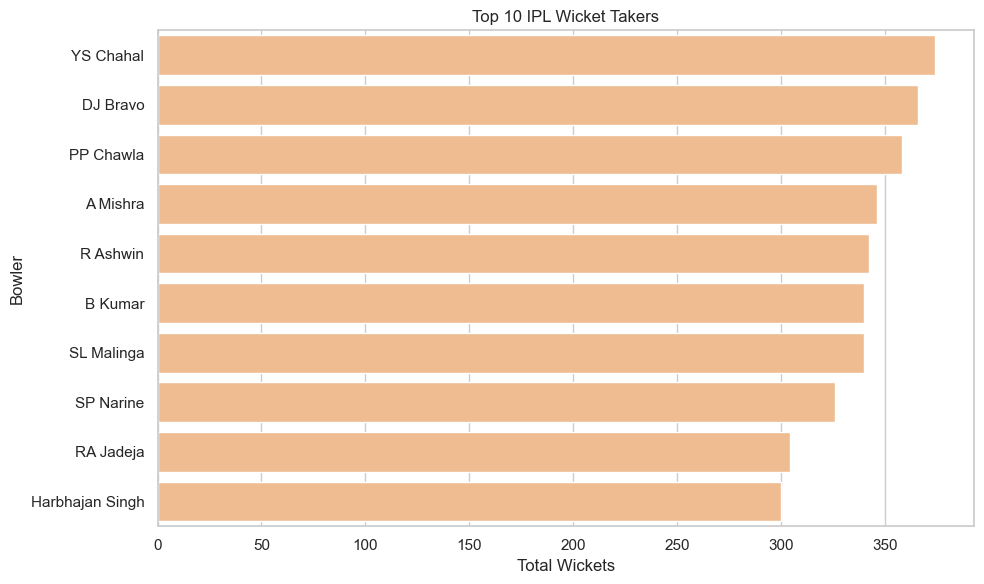

In [2]:
# -------------------- 1. Import Libraries --------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Optional: Prevent emoji-related font warnings
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Arial'

# Optional: Nice chart style
sns.set(style="whitegrid")

# -------------------- 2. Load Data --------------------
file_path = r'C:\Users\siman\OneDrive\Documents\merged_ipl_data_2008_to_2023.csv'
df = pd.read_csv(file_path, low_memory=False)

# Show available columns
print("✅ Columns in the dataset:", df.columns.tolist())

# -------------------- 3. Batting Stats --------------------
print("\n📈 Calculating batsman stats...")

# Replace missing values with 0
df[['runs_off_bat']] = df[['runs_off_bat']].fillna(0)

# Calculate batsman stats
batsman_stats = df.groupby('striker').agg(
    Total_Runs=('runs_off_bat', 'sum'),
    Balls_Faced=('striker', 'count')  # 1 row = 1 ball faced
).reset_index()

# Rename column
batsman_stats.rename(columns={'striker': 'Batsman'}, inplace=True)

# Calculate strike rate
batsman_stats['Strike_Rate'] = (batsman_stats['Total_Runs'] / batsman_stats['Balls_Faced']) * 100
batsman_stats = batsman_stats[batsman_stats['Balls_Faced'] >= 300]  # Filter out low data

# Top 10 batsmen by runs
top_batsmen = batsman_stats.sort_values(by='Total_Runs', ascending=False).head(10)

# Print
print(top_batsmen)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_batsmen, x='Total_Runs', y='Batsman', color=sns.color_palette('viridis')[3])
plt.title('Top 10 IPL Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

# -------------------- 4. Bowling Stats --------------------
print("\n🎯 Calculating bowler stats...")

# Replace NaNs
df['wicket_type'] = df['wicket_type'].fillna('')
df['extras'] = df['extras'].fillna(0)

# Create 'is_legit_ball' column: legal balls only
df['is_legit_ball'] = ~df['wides'].gt(0) & ~df['noballs'].gt(0)

# Calculate legal deliveries
df['legal_delivery'] = df['is_legit_ball'].astype(int)

# Count wickets: exclude 'run out'
df['is_wicket'] = df['wicket_type'].isin([
    'bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
]).astype(int)

# Group by bowler
bowler_stats = df.groupby('bowler').agg(
    Wickets=('is_wicket', 'sum'),
    Legal_Balls=('legal_delivery', 'sum'),
    Runs_Conceded=('runs_off_bat', 'sum')
).reset_index()

# Calculate overs bowled
bowler_stats['Overs'] = bowler_stats['Legal_Balls'] // 6 + (bowler_stats['Legal_Balls'] % 6) / 10

# Calculate economy
bowler_stats['Economy_Rate'] = bowler_stats['Runs_Conceded'] / (bowler_stats['Legal_Balls'] / 6)

# Filter bowlers who bowled at least 300 balls (50 overs)
bowler_stats = bowler_stats[bowler_stats['Legal_Balls'] >= 300]

# Top 10 wicket-takers
top_bowlers = bowler_stats.sort_values(by='Wickets', ascending=False).head(10)

# Print
print(top_bowlers[['bowler', 'Wickets', 'Overs', 'Economy_Rate']])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bowlers, x='Wickets', y='bowler', color=sns.color_palette('magma')[5])
plt.title('Top 10 IPL Wicket Takers')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


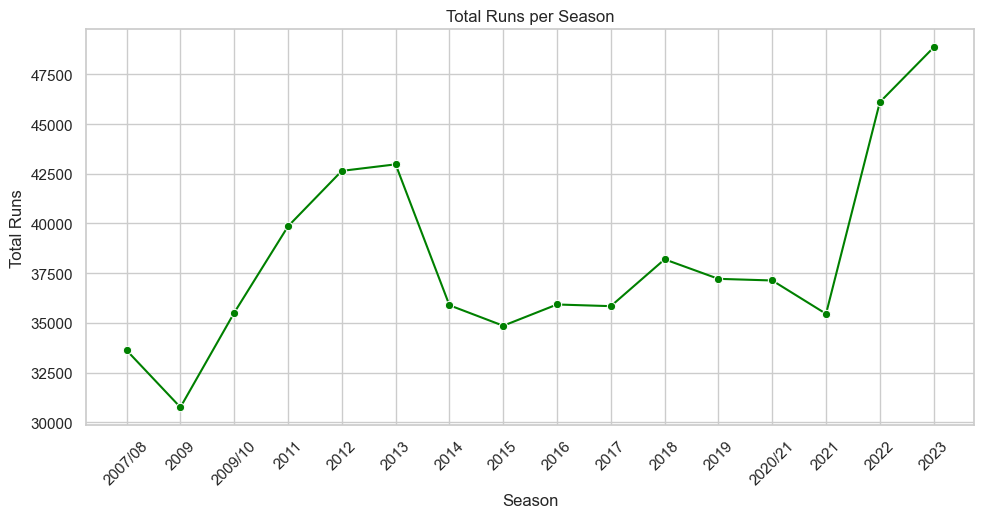

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional style
sns.set(style="whitegrid")

# Load the dataset with low_memory=False to suppress the DtypeWarning
file_path = r'C:\Users\siman\OneDrive\Documents\merged_ipl_data_2008_to_2023.csv'
df = pd.read_csv(file_path, low_memory=False)

# Convert 'season' to string (if not already)
df['season'] = df['season'].astype(str)

# Group by season and calculate total runs
season_runs = df.groupby('season')['runs_off_bat'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=season_runs, x='season', y='runs_off_bat', marker='o', color='green')
plt.title("Total Runs per Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis if needed
plt.show()


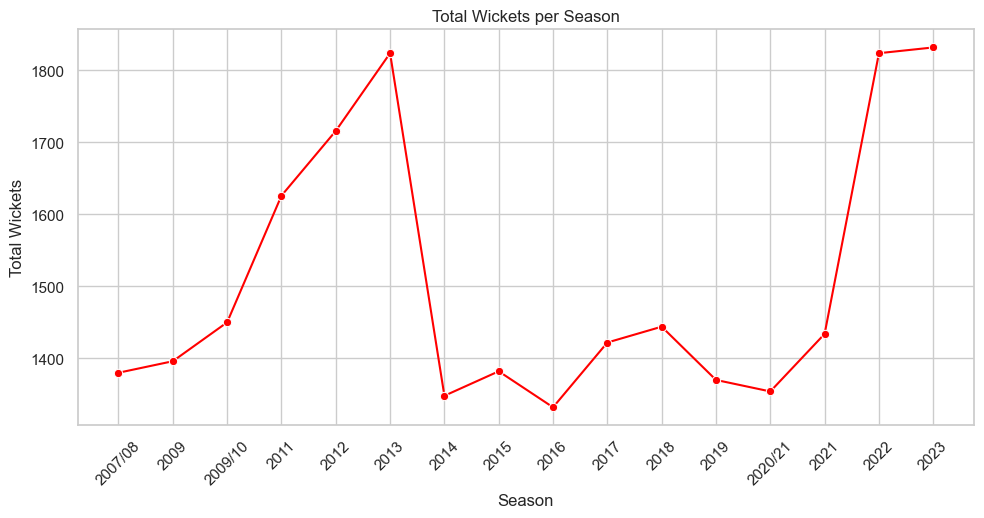

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional seaborn style for better visuals
sns.set(style="whitegrid")

# Load the IPL dataset
file_path = r'C:\Users\siman\OneDrive\Documents\merged_ipl_data_2008_to_2023.csv'
df = pd.read_csv(file_path, low_memory=False)

# Ensure 'season' is of type string (helps with sorting/categorization)
df['season'] = df['season'].astype(str)

# Filter only rows where a wicket was taken (i.e., player_dismissed is not null)
wickets_df = df[df['player_dismissed'].notna()]

# Group by season and count number of wickets
season_wickets = wickets_df.groupby('season')['player_dismissed'].count().reset_index()
season_wickets.rename(columns={'player_dismissed': 'total_wickets'}, inplace=True)

# Plot total wickets per season
plt.figure(figsize=(10, 5))
sns.lineplot(data=season_wickets, x='season', y='total_wickets', marker='o', color='red')
plt.title("Total Wickets per Season")
plt.xlabel("Season")
plt.ylabel("Total Wickets")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


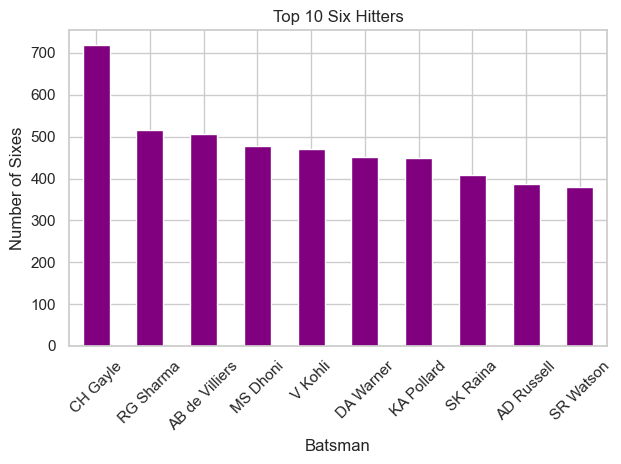

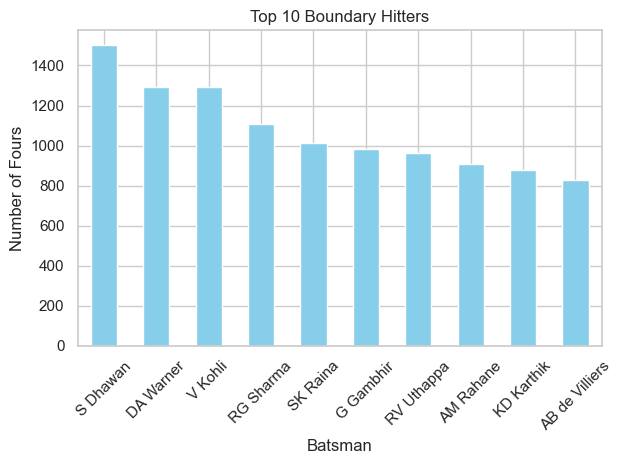

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 six hitters
six_hitters = df[df['runs_off_bat'] == 6].groupby('striker').size().sort_values(ascending=False).head(10)
six_hitters.plot(kind='bar', color='purple', title='Top 10 Six Hitters')
plt.ylabel("Number of Sixes")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 boundary hitters
fours = df[df['runs_off_bat'] == 4].groupby('striker').size().sort_values(ascending=False).head(10)
fours.plot(kind='bar', color='skyblue', title='Top 10 Boundary Hitters')
plt.ylabel("Number of Fours")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


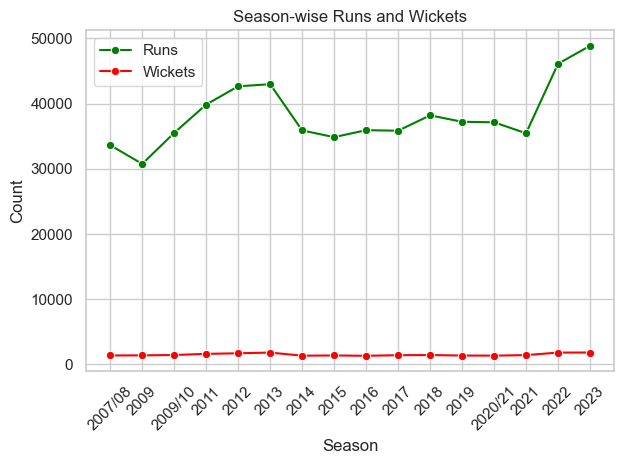

In [7]:
# Season-wise runs
season_runs = df.groupby('season')['runs_off_bat'].sum().reset_index()
sns.lineplot(data=season_runs, x='season', y='runs_off_bat', marker='o', label='Runs', color='green')

# Season-wise wickets
season_wickets = df[df['player_dismissed'].notna()].groupby('season').size().reset_index(name='wickets')
sns.lineplot(data=season_wickets, x='season', y='wickets', marker='o', label='Wickets', color='red')

plt.title("Season-wise Runs and Wickets")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


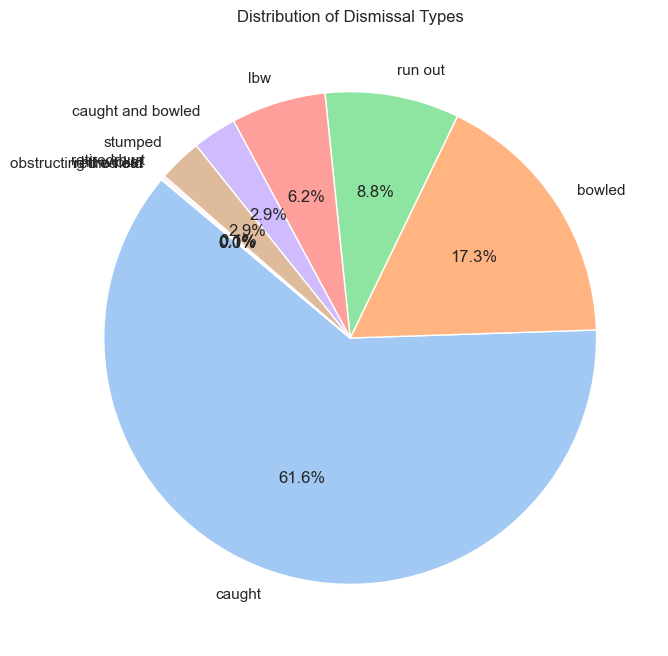

In [8]:
dismissals = df['wicket_type'].value_counts()
plt.figure(figsize=(8, 8))
dismissals.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Dismissal Types")
plt.ylabel("")
plt.show()


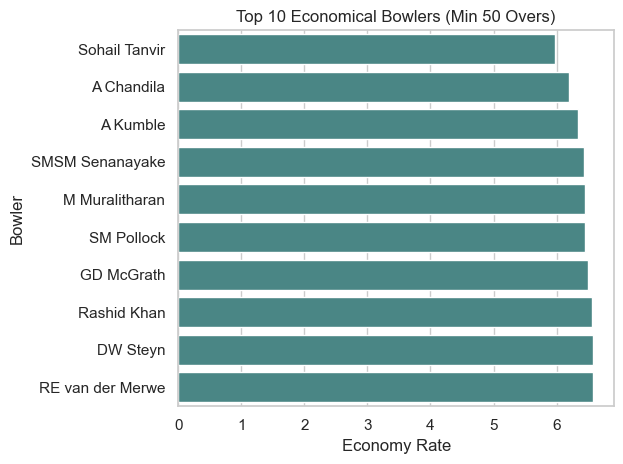

In [11]:
# Top Bowlers by Economy Rate (Min 50 Overs)
df['valid_ball'] = df['wides'].fillna(0) + df['noballs'].fillna(0)
df['is_legal'] = df['valid_ball'] == 0
legal_deliveries = df[df['is_legal']]

bowler_stats = legal_deliveries.groupby('bowler').agg({
    'runs_off_bat': 'sum',
    'ball': 'count'
}).reset_index()

bowler_stats['overs'] = bowler_stats['ball'] // 6 + (bowler_stats['ball'] % 6) / 6
bowler_stats['economy'] = bowler_stats['runs_off_bat'] / bowler_stats['overs']

top_economy = bowler_stats[bowler_stats['overs'] >= 50].sort_values('economy').head(10)

# ✅ FIXED: Use a consistent color instead of palette
sns.barplot(data=top_economy, x='economy', y='bowler', color=sns.color_palette("crest")[2])
plt.title("Top 10 Economical Bowlers (Min 50 Overs)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


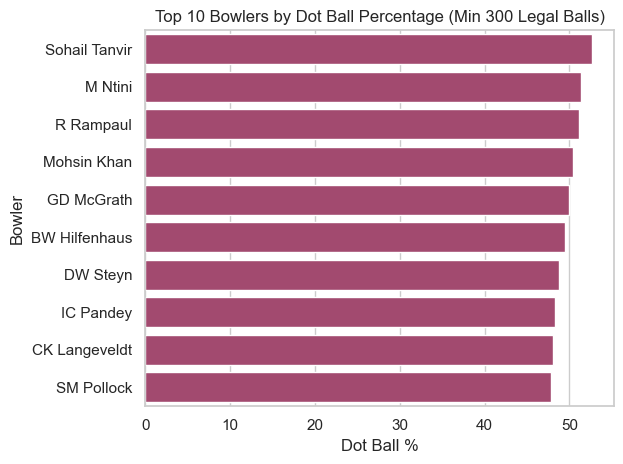

In [12]:
# 🟨 Dot Ball Percentage Chart (Fixed)

# Count dot balls (runs_off_bat == 0 and legal delivery)
df['valid_ball'] = df['wides'].fillna(0) + df['noballs'].fillna(0)
df['is_legal'] = df['valid_ball'] == 0
df['is_dot'] = (df['runs_off_bat'] == 0) & df['is_legal']

# Group by bowler and calculate dot ball percentage
dot_stats = df.groupby('bowler').agg({
    'is_dot': 'sum',
    'is_legal': 'sum'
}).reset_index()

dot_stats['dot_percent'] = (dot_stats['is_dot'] / dot_stats['is_legal']) * 100

# Filter bowlers with at least 300 legal balls
top_dot_bowlers = dot_stats[dot_stats['is_legal'] >= 300].sort_values(by='dot_percent', ascending=False).head(10)

# ✅ FIX: Use a consistent color instead of palette
sns.barplot(data=top_dot_bowlers, x='dot_percent', y='bowler', color=sns.color_palette('flare')[3])
plt.title("Top 10 Bowlers by Dot Ball Percentage (Min 300 Legal Balls)")
plt.xlabel("Dot Ball %")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()
